In [30]:
import numpy as np
from numpy.random import multivariate_normal
import matplotlib.pyplot as plt

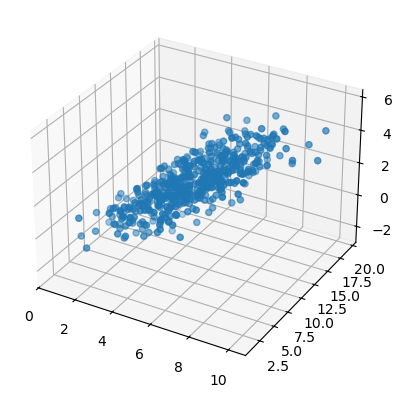

In [8]:
# In the first exercise you will generate a 3D dataset with 500 points using
# np.random.multivariate normal function with the mean vector [5, 10,
# 2] and the covariance matrix [[3, 2, 2], [2, 10, 1], [2, 1, 2]] and plot it
# (3D). 


mean = [5, 10, 2]
cov = [[3, 2, 2], [2, 10, 1], [2, 1, 2]]

data = multivariate_normal(mean, cov, 500)

plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(data[:, 0], data[:, 1], data[:, 2])
plt.show()


In [25]:
# Then you will perform the PCA steps from the course (center data, compute covariance matrix, EVD).

# center data
mean_data = np.mean(data, axis=0)
data_centered = data - mean_data

# compute covariance matrix
S = np.cov(data_centered, rowvar=False)

# EVD
eigenvalues, eigenvectors = np.linalg.eig(S)

In [26]:
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

print(eigenvalues)
print(eigenvectors)

[10.76527527  3.9323904   0.47659617]
[[-0.26083293 -0.70454755 -0.65998404]
 [-0.95140274  0.30353094  0.05197881]
 [-0.16370403 -0.64146841  0.74947934]]


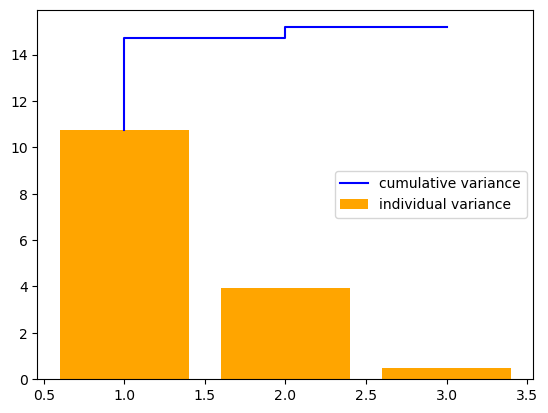

In [44]:
# Plot in the same figure both the cumulative explained variance (com-
# puted with the sorted [descending] eigenvalues and the numpy.cumsum
# function) with the pyplot.step function and the individual variances (re-
# specting the order) - using the pyplot.bar function.

cumulative_variance = np.cumsum(eigenvalues)
individual_variance = eigenvalues

plt.figure()
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, label='cumulative variance', color='blue')
plt.bar(range(1, len(individual_variance) + 1), individual_variance, label='individual variance', color='orange')
plt.legend()
plt.show()



In [51]:
def find_outliers(data, eigenvectors, contamination_rate, pca_dim):
    projected_data = np.dot(data, eigenvectors)
    pca = projected_data[:, pca_dim]
    
    mean_pca = np.mean(pca)
    threshold_pca = np.quantile(np.abs(pca - mean_pca), 1 - contamination_rate)
    
    outliers = np.abs(pca - mean_pca) > threshold_pca
    
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(data[~outliers, 0], data[~outliers, 1], data[~outliers, 2], alpha=0.6, label='Normal')

    ax.scatter(data[outliers, 0], data[outliers, 1], data[outliers, 2], color='r', alpha=0.6, label='Outliers')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'Outliers Based on {pca_dim + 1} PCA Dimension')
    ax.legend()
    plt.show()
    

In [56]:
def find_outliers_normalized(data, eigenvectors, contamination_rate):
    projected_data = np.dot(data, eigenvectors)
    
    std_dev = np.std(projected_data, axis=0)
    
    normalized_distance = np.sqrt(np.sum(((projected_data - np.mean(projected_data, axis=0)) / std_dev) ** 2, axis=1))

    
    threshold_pca = np.quantile(normalized_distance, 1 - contamination_rate)
    
    outliers = normalized_distance > threshold_pca
    
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Normal data points
    ax.scatter(data[~outliers, 0], data[~outliers, 1], data[~outliers, 2], alpha=0.6, label='Normal')

    # Outliers
    ax.scatter(data[outliers, 0], data[outliers, 1], data[outliers, 2], color='r', alpha=0.6, label='Outliers')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Outliers Based on Normalized Distance in Principal Component Space')
    ax.legend()
    plt.show()

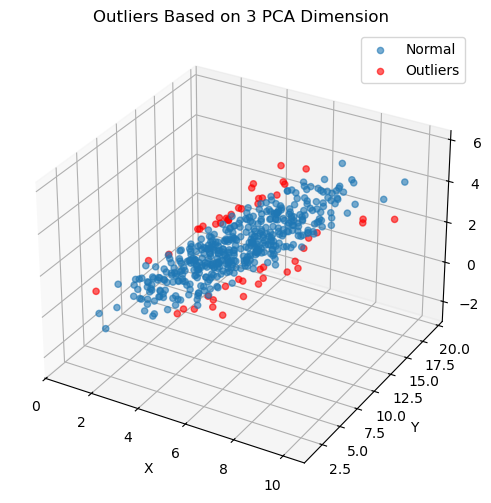

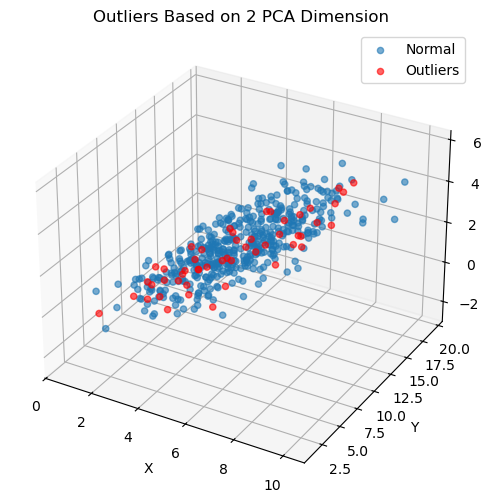

In [52]:
find_outliers(data, eigenvectors, 0.1, 2)
find_outliers(data, eigenvectors, 0.1, 1)

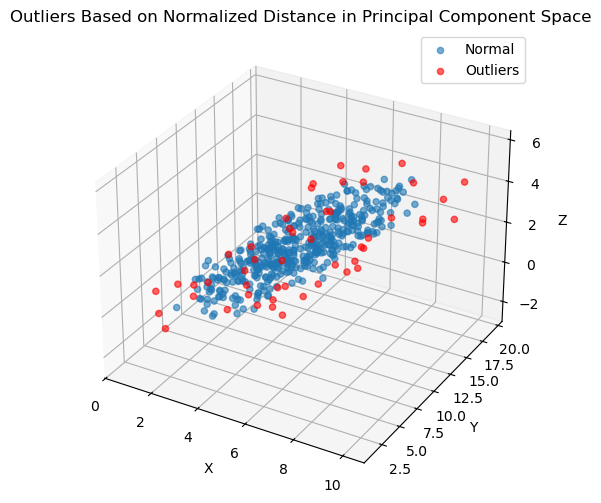

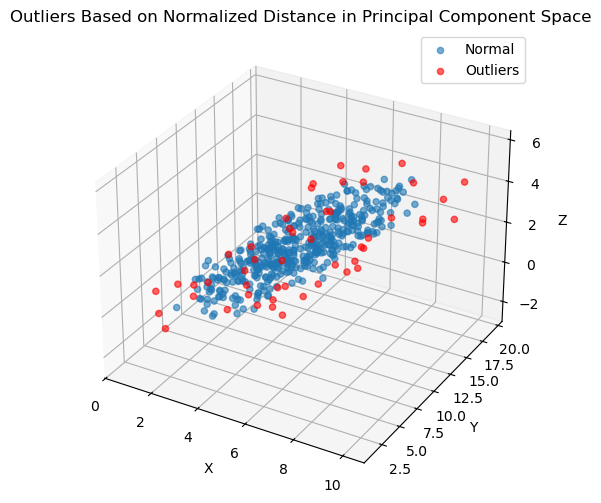

In [58]:
find_outliers_normalized(data, eigenvectors, 0.1)
find_outliers_normalized(data, eigenvectors, 0.1)